In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Ising Model using Monte Carlo Sim 
## Absence of External Magnetising field

In [2]:
#Creating a random Lattice
N = 20

Lattice = np.zeros((N, N))
for i in range (0,N):
    for j in range (0,N):
        Lattice[i,j] = np.random.choice([-1, 1])

Ideally I should have written a small function to generate a fresh lattice. However, doing this somehow prohibited any operation on the generated lattice, like using it for the Monte Carlo Sweeps etc. Thus, I skipped that idea and instead stuck to copy-pasting the code for a fresh Lattice.

In [3]:
#The main functions used in the code
J = 1
kb = 1
T = 1

def monte_carlo_sweep(Lattice, N, J, kb, T):
    beta = 1/(kb*T)
    
    for i in range (0, N):
        for j in range (0, N):
            nb = Lattice[(i-1)%N, j] + Lattice[(i+1)%N, j] + Lattice[i, (j+1)%N] + Lattice[i, (j-1)%N] 
            #Periodic Boundaries ^
            dE = 2 * J * Lattice[i,j] * nb

            if dE < 0:
                Lattice[i,j] = Lattice[i, j] * (-1)
            elif np.random.rand() < np.exp(-beta*dE):
                Lattice[i,j] = Lattice[i, j] * (-1)
    return Lattice

def Visualize(Lattice, N):
    x_up = []
    y_up = []
    x_down = []
    y_down = []
    for i in range (0, N):
        for j in range (0, N):
            if Lattice[i,j]== -1:
                x_down.append(j)
                y_down.append(i)
                
            else:
                x_up.append(j)
                y_up.append(i)
                
    plt.scatter(x_down, y_down, color = 'red', marker ='s')#11)
    plt.scatter(x_up, y_up, color = 'black', marker = 's')#6)
    return plt.show()

def Total_Magnetization(Lattice):
    return np.sum(Lattice)              #I'm not sure of the formula, haven't studied this yet. 
                                        #This function may be wrong

def Total_Energy(Lattice, N):
    Energy = 0
    for i in range(0, N):
        for j in range(0, N):
            nb = Lattice[(i-1)%N, j] + Lattice[(i+1)%N, j] + Lattice[i, (j+1)%N] + Lattice[i, (j-1)%N]
            Energy += -J*nb*Lattice[i,j]
            
    return Energy/4

12.0
36.0


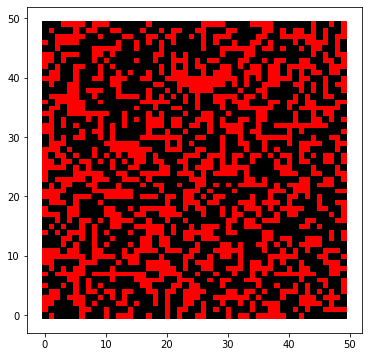

In [102]:
#Trial Run: create fresh Lattice
 
N = 50          #Size of Lattice
J = 1           #Interaction Energy
kb = 1          #Boltzmann Constant
T = 1           #Temperature


Lattice = np.zeros((N, N))
for i in range (0,N):
    for j in range (0,N):
        Lattice[i,j] = np.random.choice([-1, 1])
print(Total_Energy(Lattice, N))
print(Total_Magnetization(Lattice))
plt.rcParams['figure.figsize']=[6,6]
Visualize(Lattice, N)

-1582.0
150.0


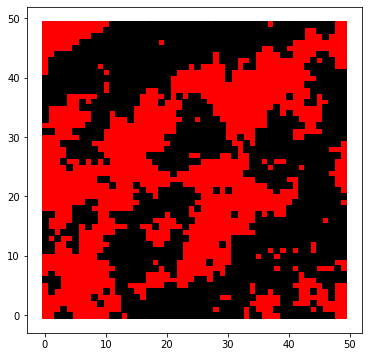

In [103]:
#Trial Simulations
for i in range (2):    #Define how many sweeps you want
    monte_carlo_sweep(Lattice, N, J, kb, T)
    
print(Total_Energy(Lattice, N))
print(Total_Magnetization(Lattice))
Visualize(Lattice, N)

fig size: 72.0 DPI, size in inches [6. 6.]


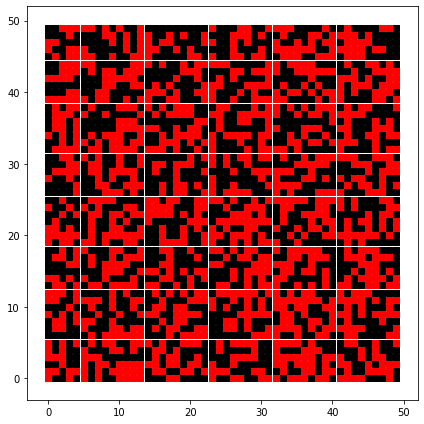

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


timestep 0
timestep 0
timestep 1
timestep 2
timestep 3
timestep 4
timestep 5
timestep 6
timestep 7
timestep 8
timestep 9
timestep 10
timestep 11
timestep 12
timestep 13
timestep 14
timestep 15
timestep 16
timestep 17
timestep 18
timestep 19
timestep 20
timestep 21
timestep 22
timestep 23
timestep 24
timestep 25
timestep 26
timestep 27
timestep 28
timestep 29
timestep 30
timestep 31
timestep 32
timestep 33
timestep 34
timestep 35
timestep 36
timestep 37
timestep 38
timestep 39
timestep 40
timestep 41
timestep 42
timestep 43
timestep 44
timestep 45
timestep 46
timestep 47
timestep 48
timestep 49


In [105]:
#The Code for Creating a visual animation 
#I have provided a link to view the generated animation. This code is only for reference.

import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots(figsize=[6, 6])
fig.set_tight_layout(True)


print('fig size: {0} DPI, size in inches {1}'.format(
    fig.get_dpi(), fig.get_size_inches()))


Visualize(Lattice, N)
def update(i):
    label = 'timestep {0}'.format(i)
    print(label)
    monte_carlo_sweep(Lattice, N, J, kb, T)
    Visualize(Lattice, N)
    ax.set_ylim(0, 50)
    ax.set_xlim(0, 50)
    ax.set_xlabel(label)
    return ax


#anim = FuncAnimation(fig, update, frames=np.arange(0, 50), interval=100)
    
#anim.save('Equilibriation2.gif', dpi=20, writer='imagemagick')

## Observing Magnetization with Temperature

First, the Equilibration Time was determined. Since I do not have understanding of how to define Equilibrium in statistical terms, I defined equilibrium as that point when the Total Energy of the Lattice can stochastically increase instead of decreasing. This was defined such, keeping in mind my observations from several trial simulations.

I ran several simulations for varying temperatures and determined the maximum equilibration time required for a Lattice of size 20x20 and 50x50. Henceforth, each simulation was run for this maximum equilibration time to ensure equilibrium in each result. 

In [99]:
#WARNING: RUNNING THIS CELL WILL TAKE ATLEAST 2-3 MINS OF COMPUTATIONAL TIME.
#================================
#Parameters
T = 0.1       #Starting Temperature
N = 20
J = 1
kb = 1

#================================
#Program to run several simulations for a range of temperatures and return total magnetization with Temperature

Temperature = []
Magnetization = []

for Temp in range (0, 80):
    for trial in range (0, 10):
        #Make fresh lattice
        Lattice = np.zeros((N, N))
        for i in range (0,N):
            for j in range (0,N):
                Lattice[i,j] = np.random.choice([-1, 1])
        
        #Energies=[]                   #Energies were initially used to determine equilibration time.
                                       #Not required anymore
        #Energies.append(0)
        #Energies.append(-1)
        #print(Energies[-1])
        #while (Energies[-1]-Energies[-2]) < 0:
        for runs in range (20):
            monte_carlo_sweep(Lattice, N, J, kb, T)
            
            print(runs)                #To keep track of the Sim when it's running
            Energies.append(Total_Energy(Lattice, N))
        Temperature.append(T)
        Magnetization.append(Total_Magnetization(Lattice))
    T += 0.05
    
#================================

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8


13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12


9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8


## Plotting the Temperature v/s Magnetization scatter

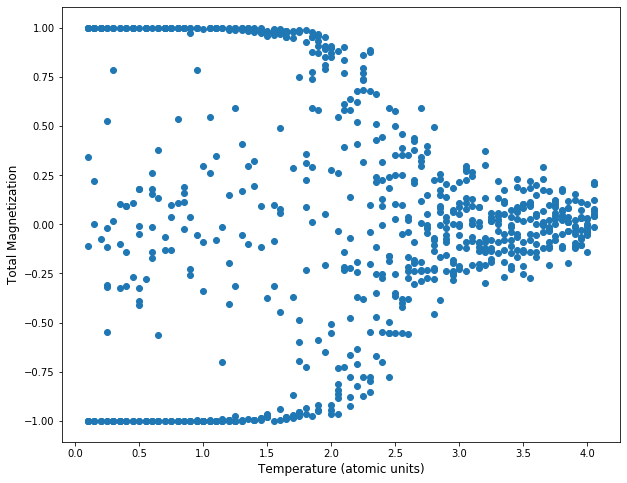

In [100]:
Mag = []
for i in range (len(Magnetization)):
    Mag.append(Magnetization[i]/400)
plt.scatter(Temperature, Mag)
plt.xlabel("Temperature (atomic units)", fontsize = '12')
plt.ylabel("Total Magnetization", fontsize = '12')
plt.rcParams['figure.figsize']=[10,8]
plt.show()